# 1. MNIST

### 데이터셋을 라이브러리에서 가져올 예정. 파일에서도 가져옴

In [1]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras.datasets import mnist # mnist 데이터 셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from matplotlib import pyplot as plt # 학습과정 Loss와 acc 시각화
# quiz에서는 scale조정, train_test_split 등을 추가

In [2]:
import numpy as np
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

5.0


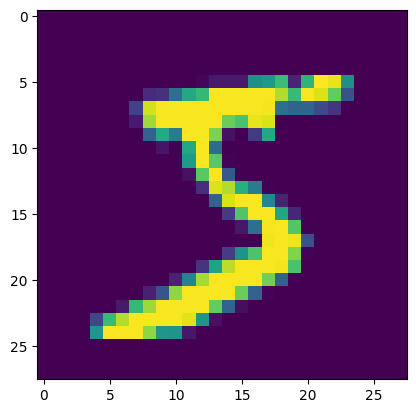

In [3]:
import matplotlib.pyplot as plt
print(data[0,0])
img = data[0, 1:].reshape(28, 28)
plt.imshow(img)

In [4]:
for row in data[1,1:].reshape(28,28):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

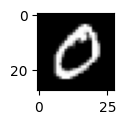

In [7]:
plt.figure(figsize=(1,1))
plt.imshow(data[1, 1:].reshape(28,28), cmap='gray')

In [15]:
! pip install opencv-contrib-python

   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   -- ------------------------------------- 2.4/46.2 MB 12.2 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/46.2 MB 11.9 MB/s eta 0:00:04
   ------ --------------------------------- 7.1/46.2 MB 11.8 MB/s eta 0:00:04
   -------- ------------------------------- 9.7/46.2 MB 11.6 MB/s eta 0:00:04
   ---------- ----------------------------- 12.1/46.2 MB 11.6 MB/s eta 0:00:03
   ------------ --------------------------- 14.7/46.2 MB 11.7 MB/s eta 0:00:03
   -------------- ------------------------- 17.0/46.2 MB 11.7 MB/s eta 0:00:03
   ----------------- ---------------------- 19.7/46.2 MB 11.6 MB/s eta 0:00:03
   ------------------- -------------------- 22.3/46.2 MB 11.7 MB/s eta 0:00:03
   --------------------- ------------------ 24.6/46.2 MB 11.6 MB/s eta 0:00:02
   ----------------------- ---------------- 27.3/46.2 MB 11.6 MB/s eta 0:00:02
   ------------------------- -------------- 29.9/46.2 MB 11.6 MB/

In [16]:
! pip show opencv-contrib-python

Name: opencv-contrib-python
Version: 4.11.0.86
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: c:\users\admin\anaconda3\envs\ml-dl-nlp\lib\site-packages
Requires: numpy
Required-by: 


In [8]:
# 컬러사진 -> 흑백모드의 넘파이 배열로
import cv2